In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

house_df = pd.read_csv("../../src/kc_house_data.csv")

print(f"El archivo contiene {house_df.shape[0]} filas y {house_df.shape[1]} columnas")
print(house_df.info())
print(f"Nombre de las columnas: {house_df.columns}")

El archivo contiene 21613 filas y 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat          

In [12]:
# Estadisticas descriptivas --------------------------------------------------------------------

house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


A simple vista de las estadisticas no parece que los datos tengas valores atipicos

In [39]:
house_df.iloc[:,5].dtype

dtype('int64')

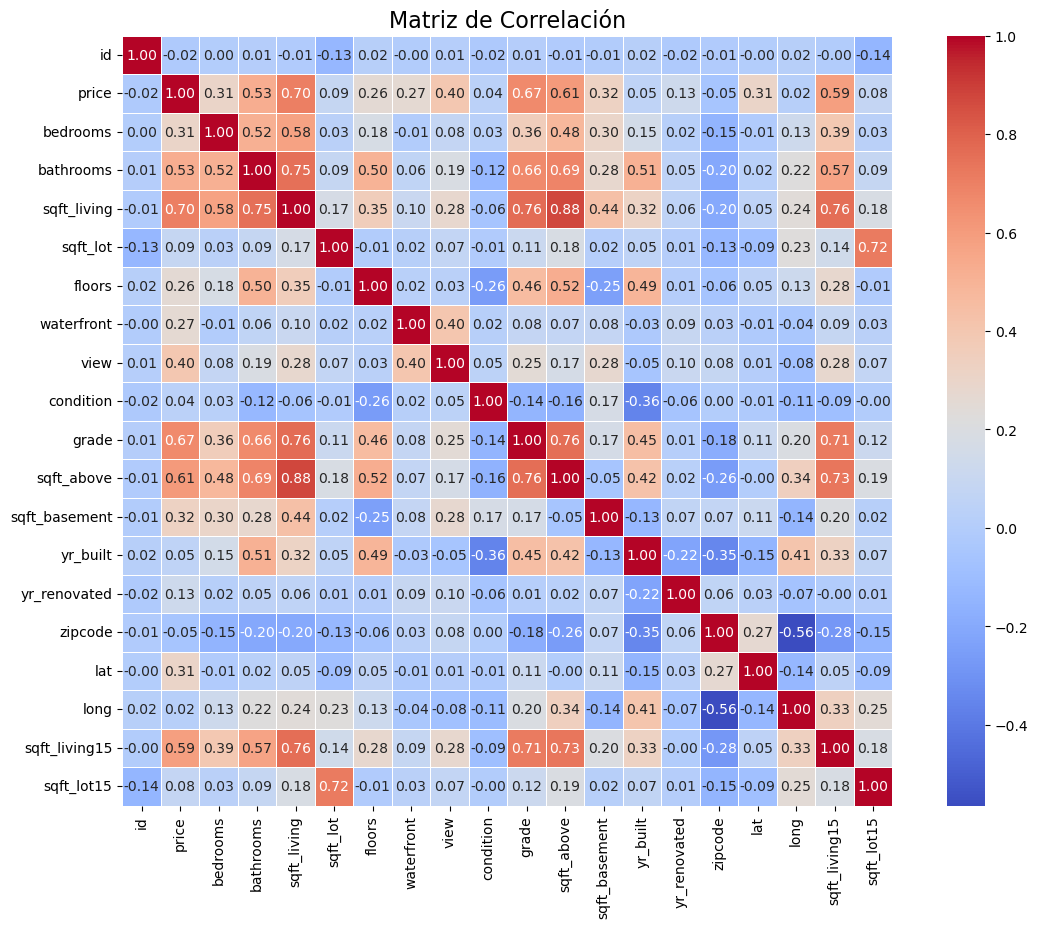

In [97]:
house_numeric = house_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 10), dpi = 100) 
sns.heatmap(
    house_numeric.corr(),
    annot=True,        
    fmt=".2f",     
    cmap="coolwarm",       
    linewidths=0.5,        
    square=True               
)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

Se pueden identificar fuertes correlaciones entre el precio, el numero de baños, habitaciones, pisos y area de la vivienda, esto es concuerda ya que si a un mayor numero de estas variables el precio tiende a aumentar. Ademas tambien se pueden encontrar correlaciones negativas como por ejemplo el año de la construcción y la condición.

C:\Users\nikol\AppData\Local\Temp\ipykernel_32456\1962608382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=house_df, palette='Set2')
C:\Users\nikol\AppData\Local\Temp\ipykernel_32456\1962608382.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathrooms', y='price', data=house_df, palette='Set3')


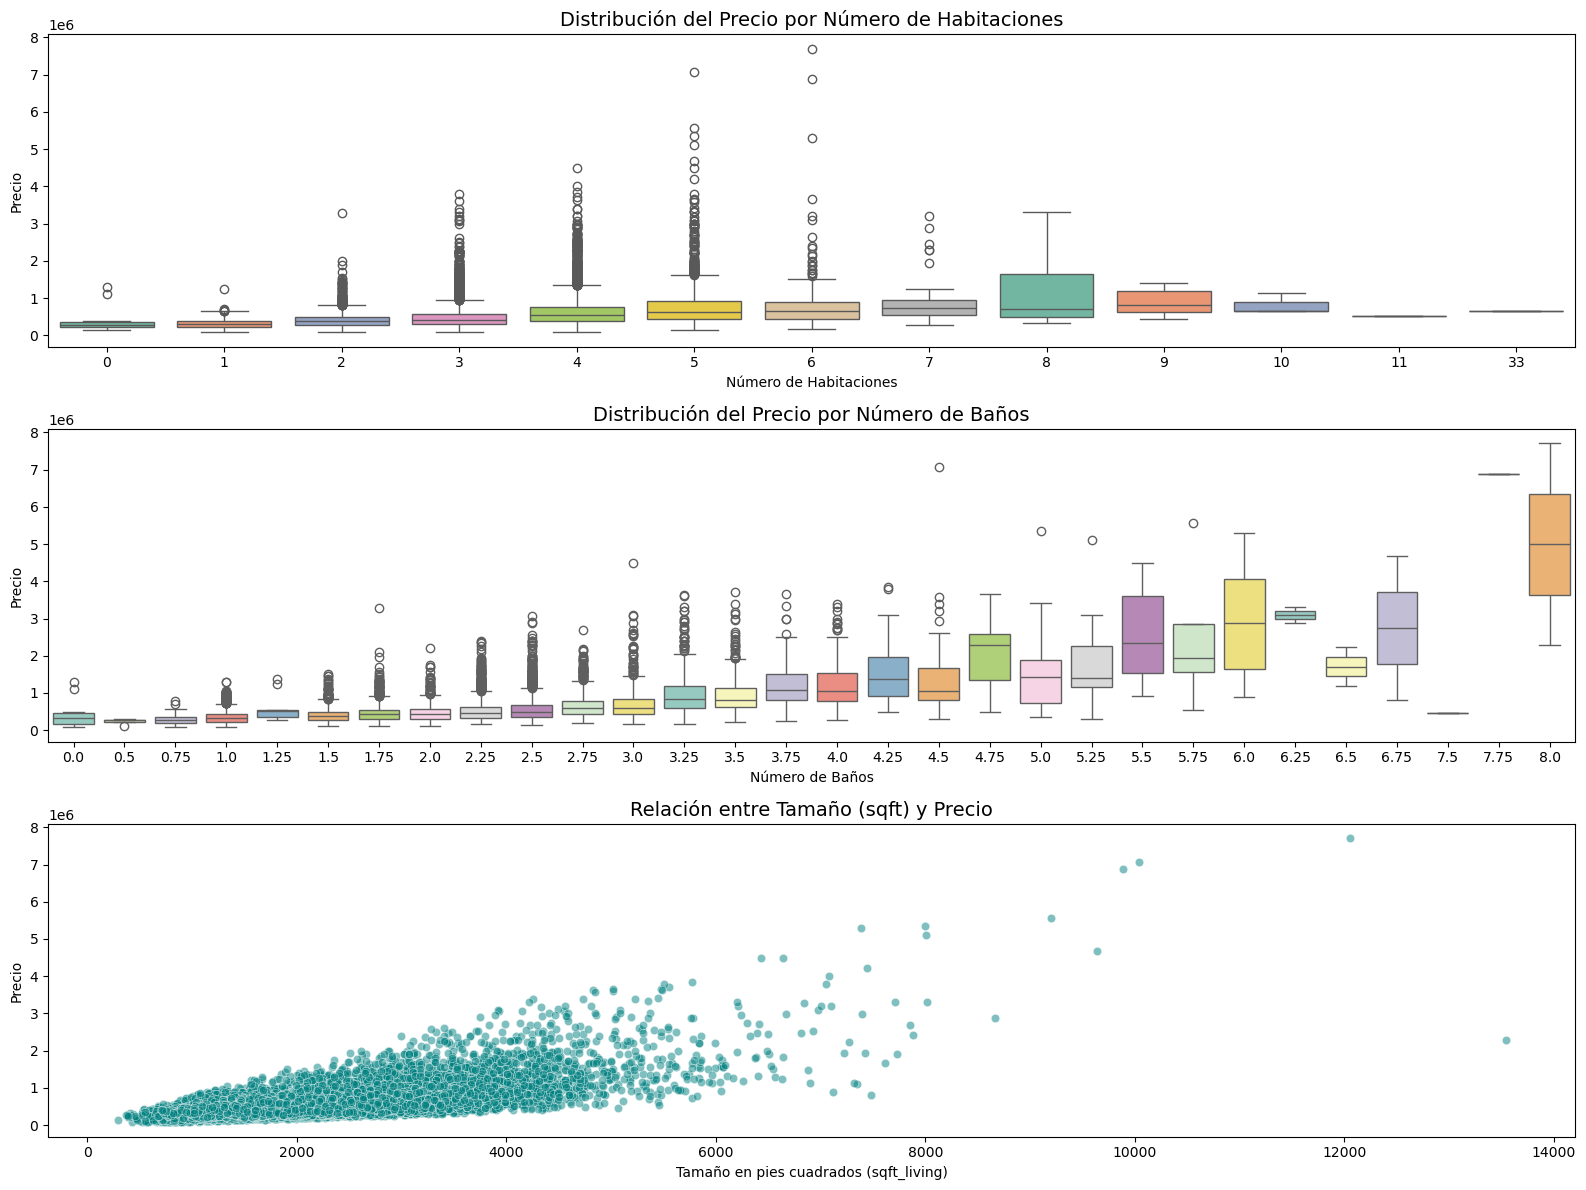

In [91]:
plt.figure(figsize=(16, 12))

# Boxplot: Price vs Bedrooms
plt.subplot(3, 1, 1)
sns.boxplot(x='bedrooms', y='price', data=house_df, palette='Set2')
plt.title('Distribución del Precio por Número de Habitaciones', fontsize=14)
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')

# Boxplot: Price vs Bathrooms
plt.subplot(3, 1, 2)
sns.boxplot(x='bathrooms', y='price', data=house_df, palette='Set3')
plt.title('Distribución del Precio por Número de Baños', fontsize=14)
plt.xlabel('Número de Baños')
plt.ylabel('Precio')

# Scatterplot: Price vs Sqft Living
plt.subplot(3, 1, 3)
sns.scatterplot(x='sqft_living', y='price', data=house_df, alpha=0.5, color='teal')
plt.title('Relación entre Tamaño (sqft) y Precio', fontsize=14)
plt.xlabel('Tamaño en pies cuadrados (sqft_living)')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

En los tres graficos a medida que aumenta la variable aumenta el precio, sin embargo, tambien se evidencia una alta cantidad de datos atipicos que estan fuera de las medias

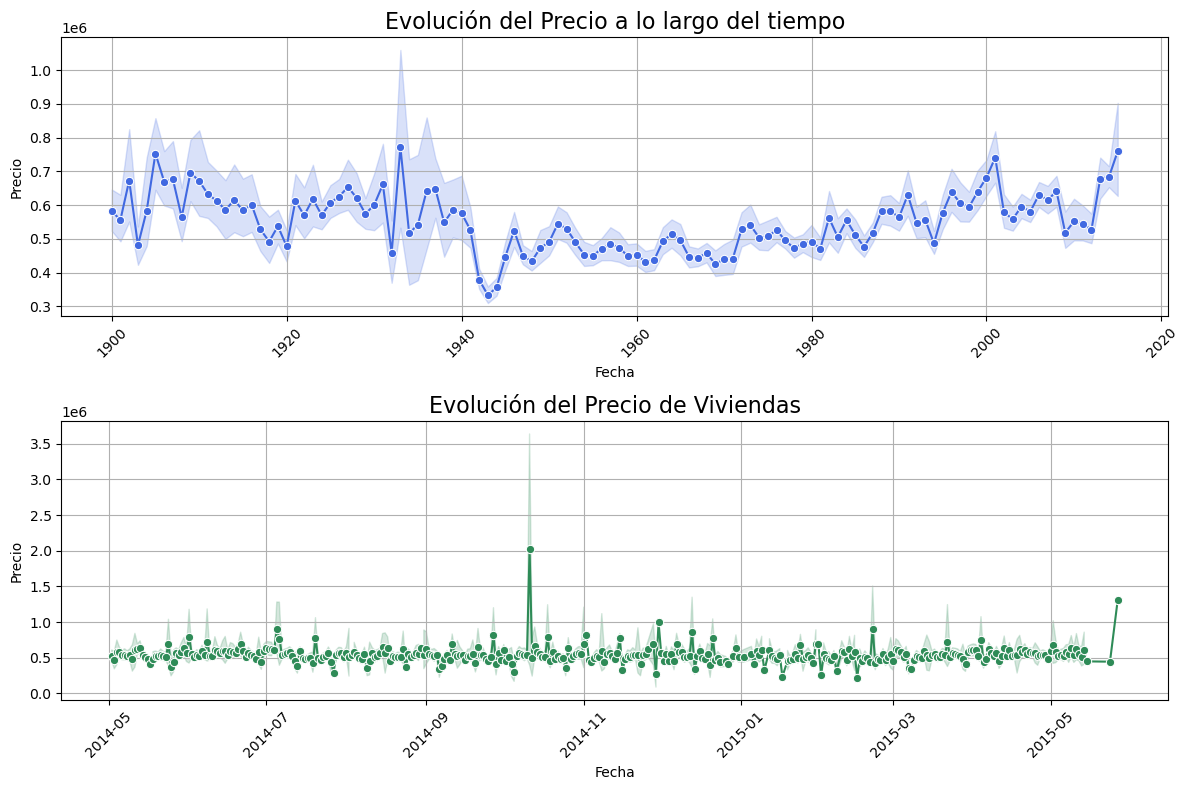

In [95]:

house_df['date'] = pd.to_datetime(house_df['date'])
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.lineplot(x=house_df.yr_built, y=house_df['price'], marker='o', color='royalblue')
plt.title('Evolución del Precio a lo largo del tiempo', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.lineplot(x=house_df.date, y=house_df['price'], marker='o', color='seagreen')
plt.title('Evolución del Precio de Viviendas', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.grid(True)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
